## Aroon

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:aroon

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2017-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,110.691154,28781900
2017-01-04,115.849998,116.510002,115.750000,116.019997,110.567276,21118100
2017-01-05,115.919998,116.860001,115.809998,116.610001,111.129562,22193600
2017-01-06,116.779999,118.160004,116.470001,117.910004,112.368469,31751900
2017-01-09,117.949997,119.430000,117.940002,118.989998,113.397697,33561900


In [3]:
n = 25 
high_max = lambda xs: np.argmax(xs[::-1])
low_min = lambda xs: np.argmin(xs[::-1])

df['Days since last High'] = df['High'].rolling(center=False,min_periods=0,window=n).apply(func=high_max).astype(int)
    
df['Days since last Low'] = df['Low'].rolling(center=False,min_periods=0,window=n).apply(func=low_min).astype(int)
    
df['Aroon_Up'] = ((25-df['Days since last High'])/25) * 100
df['Aroon_Down'] = ((25-df['Days since last Low'])/25) * 100

In [4]:
df = df.drop(['Days since last High', 'Days since last Low'],axis=1)

In [5]:
df.head(30)

,Open,High,Low,Close,Adj Close,Volume,Aroon_Up,Aroon_Down
Date,,,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,110.691154,28781900,100.0,100.0
2017-01-04,115.849998,116.510002,115.750000,116.019997,110.567276,21118100,100.0,96.0
2017-01-05,115.919998,116.860001,115.809998,116.610001,111.129562,22193600,100.0,92.0
2017-01-06,116.779999,118.160004,116.470001,117.910004,112.368469,31751900,100.0,88.0
2017-01-09,117.949997,119.430000,117.940002,118.989998,113.397697,33561900,100.0,84.0
2017-01-10,118.769997,119.379997,118.300003,119.110001,113.512070,24462100,96.0,80.0
2017-01-11,118.739998,119.930000,118.599998,119.750000,114.121986,27588600,100.0,76.0
2017-01-12,118.900002,119.300003,118.209999,119.250000,113.645454,27086200,96.0,72.0
2017-01-13,119.110001,119.620003,118.809998,119.040001,113.445343,26111900,92.0,68.0


No handles with labels found to put in legend.


Text(0.5, 0, 'Date')

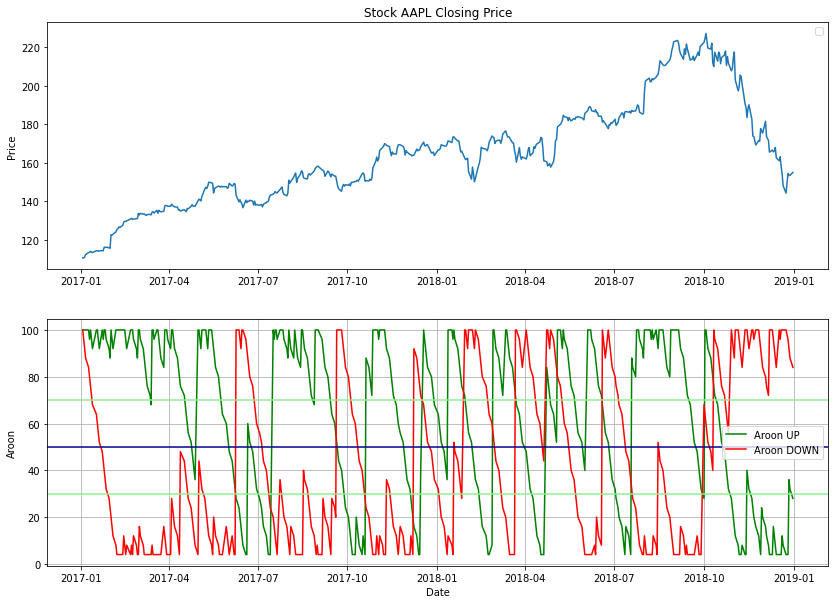

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Aroon_Up'], label='Aroon UP', color='g')
ax2.plot(df['Aroon_Down'], label='Aroon DOWN', color='r')
ax2.axhline(y=70, color='lightgreen')
ax2.axhline(y=50, color='darkblue')
ax2.axhline(y=30, color='lightgreen')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Aroon')
ax2.set_xlabel('Date')

## Candlestick with Aroon

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

TypeError: dtype '<class 'datetime.date'>' not understood

In [ ]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Aroon_Up'], label='Aroon UP', color='g')
ax2.plot(df['Aroon_Down'], label='Aroon DOWN', color='r')
ax2.axhline(y=70, color='lightgreen')
ax2.axhline(y=50, color='darkblue')
ax2.axhline(y=30, color='lightgreen')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Aroon')
ax2.set_xlabel('Date')